## MF815 Midterm Project
## Sike Yang

### Data Cleaning

In [2]:
#imported data
import pandas as pd
train = pd.read_csv("/Users/estelle/Desktop/MF815/train.csv")
train.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)

In [3]:
#data cleaning
#set imbalanced data to na value
import numpy as np
for i in range(len(train)):
    for j in range(1,len(train.T)):
        if train.iloc[i,j]>10:
            train.iloc[i,j] = np.NaN

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5455 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  5455 non-null   float64
 2    ROA(A) before interest and % after tax                   5455 non-null   float64
 3    ROA(B) before interest and depreciation after tax        5455 non-null   float64
 4    Operating Gross Margin                                   5455 non-null   float64
 5    Realized Sales Gross Margin                              5455 non-null   float64
 6    Operating Profit Rate                                    5455 non-null   float64
 7    Pre-tax net Interest Rate                                5455 non-null   float64
 8    After-tax net Int

In [5]:
#replace the na value with mean
import numpy as np
for col in train:
    train[col].fillna(value=np.average(train[col].dropna()), inplace=True)

In [6]:
train.describe()

,Index,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.0,5455.000000,5455.000000
mean,3408.896425,0.504850,0.558483,0.553227,0.607915,0.607898,0.998969,0.797377,0.809285,0.303502,...,0.008829,0.623946,0.607913,0.840367,0.280434,0.027591,0.565197,1.0,0.047007,0.031164
std,1985.117561,0.060078,0.065299,0.061118,0.016327,0.016314,0.000879,0.002826,0.002763,0.004043,...,0.035104,0.013268,0.016327,0.015754,0.015504,0.017339,0.013107,0.0,0.047214,0.173777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.962961,0.616328,0.636191,0.062507,...,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1671.500000,0.476235,0.535516,0.527062,0.600365,0.600351,0.998970,0.797386,0.809312,0.303466,...,0.000905,0.623631,0.600363,0.840113,0.276945,0.026791,0.565158,1.0,0.024360,0.000000
50%,3403.000000,0.502901,0.559911,0.552278,0.605897,0.605868,0.999022,0.797464,0.809375,0.303525,...,0.002119,0.623875,0.605897,0.841178,0.278786,0.026809,0.565254,1.0,0.033738,0.000000
75%,5148.500000,0.535197,0.588830,0.583730,0.613691,0.613655,0.999094,0.797579,0.809469,0.303585,...,0.005313,0.624171,0.613687,0.842350,0.281520,0.026913,0.565722,1.0,0.052838,0.000000
max,6817.000000,0.864964,0.984736,0.932598,1.000000,1.000000,1.000000,0.850681,0.864386,0.446321,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.735958,1.0,1.000000,1.000000


(array([5285.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         170.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

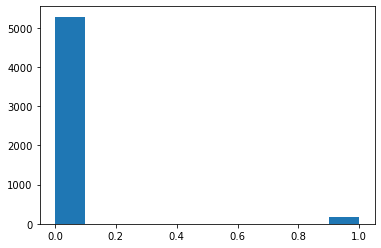

In [7]:
import matplotlib.pyplot as plt
plt.hist(train["Bankrupt?"])

### Feature Selection

In [28]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
# define random forest classifier
X = np.array(train.iloc[:,1:96])
y = np.array(train["Bankrupt?"])
y = y.ravel()
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [29]:
from boruta import BorutaPy
# define Boruta feature selection method
feat_selector = BorutaPy(forest, random_state=1, verbose=2)
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	95
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	9 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	13 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	14 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	15 / 100
Confirmed: 	52
Tentative: 	19
Rejected: 	24
Iteration: 	16 / 100
Confirmed: 	53
Tentative: 	

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=1000, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F9D53FC2540),
         random_state=RandomState(MT19937) at 0x7F9D53FC2540, verbose=2)

In [30]:
# check selected features
feat_selector.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True,  True, False,  True])

In [31]:
# check ranking of features
feat_selector.ranking_

array([ 1,  1,  1,  3,  5,  1,  1,  1,  1,  1, 35, 38,  8,  1,  1,  1,  1,
        1,  1, 24,  2,  1,  1, 17, 20, 12, 14,  1, 39,  1,  7, 31,  1,  1,
        1,  1,  1,  1,  1,  1, 37,  1,  1, 11,  2,  1,  1, 36, 24, 27, 14,
        1,  1,  1, 29, 26,  1,  1,  1,  1, 10,  1,  5, 33,  1,  1, 16,  1,
        1, 12, 18, 32,  1, 20, 22, 30, 33,  1,  1,  8,  1, 19, 28,  1, 40,
        1,  3, 22,  3,  1,  1,  1,  1, 41,  1])

In [32]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

### Random Forest

In [89]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# First create the base model to tune
rf = RandomForestClassifier()
# Fit the random forest model
rf.fit(X_train, y_train)
prediction = rf.predict(X_val)
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score,confusion_matrix,roc_curve
# Display accuracy score
print("For base model:")
print("The accuracy score is" , accuracy_score(y_val, prediction))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction))

For base model:
The accuracy score is 0.9715857011915674
The F1 score is 0.27906976744186046
The auc is 0.591389282341832


In [90]:
#Deal with the imbalanced date
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)
rf.fit(X_train_sm,y_train_sm)
prediction = rf.predict(X_val)
print("For base and oversampling model:")
print("The accuracy score is" , accuracy_score(y_val, prediction))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction))

For base and oversampling model:
The accuracy score is 0.9688359303391384
The F1 score is 0.5526315789473685
The auc is 0.8172656987724268


In [91]:
#tune parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [162]:
#increase n_estimators
from sklearn.model_selection import GridSearchCV
import warnings
warnings.warn('ignore')
rf1 = RandomForestClassifier(class_weight='balanced',random_state=1)
params = {'n_estimators':[200,400,600,800],
          'max_features':['sqrt', 'log2', "auto", 10]}
gsv_rf = GridSearchCV(rf1, params, cv=10, n_jobs=-1, scoring='f1')
gsv_rf.fit(X_train_sm,y_train_sm)

/var/folders/hk/kb4d7y8d5_191cy2wqvq1jtm0000gn/T/ipykernel_5924/2779819535.py:4: UserWarning: ignore
  warnings.warn('ignore')


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', 'auto', 10],
                         'n_estimators': [200, 400, 600, 800]},
             scoring='f1')

In [93]:
gsv_rf.best_params_

{'max_features': 10, 'n_estimators': 200}

In [148]:
prediction_rf = RandomForestClassifier(class_weight='balanced',max_features=10,n_estimators=200,random_state=1).fit(X_train_sm,y_train_sm).predict(X_val)
#
# Display accuracy score
print("The accuracy score is" , accuracy_score(y_val, prediction_rf))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction_rf))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction_rf))

The accuracy score is 0.9706691109074244
The F1 score is 0.5675675675675675
The auc is 0.818209985835694


In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_val,prediction_rf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1059
           1       0.50      0.66      0.57        32

    accuracy                           0.97      1091
   macro avg       0.74      0.82      0.78      1091
weighted avg       0.98      0.97      0.97      1091



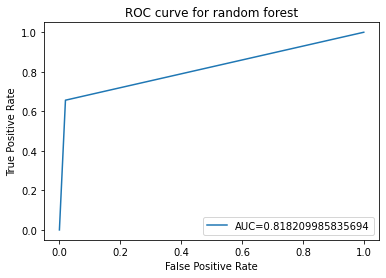

In [150]:
#ROC curve
fpr, tpr, _ = roc_curve(y_val,prediction_rf)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(roc_auc_score(y_val, prediction_rf)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve for random forest")
plt.legend(loc=4)
plt.show()

### KNN

In [160]:
knn_base = KNeighborsClassifier().fit(X_train,y_train)
prediction = knn_base.predict(X_val)
print("For KNN base model:")
print("The accuracy score is" , accuracy_score(y_val, prediction))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction))

For KNN base model:
The accuracy score is 0.9715857011915674
The F1 score is 0.24390243902439024
The auc is 0.5762364258734655


In [161]:
knn_base = KNeighborsClassifier().fit(X_train_sm,y_train_sm)
prediction = knn_base.predict(X_val)
print("For base and oversampling KNN model:")
print("The accuracy score is" , accuracy_score(y_val, prediction))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction))

For base and oversampling KNN model:
The accuracy score is 0.9037580201649863
The F1 score is 0.3137254901960784
The auc is 0.8292020774315392


In [102]:
#find the best K value
from sklearn.neighbors import KNeighborsClassifier 
f1_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sm, y_train_sm)
    prediction = knn.predict(X_val)
    f1_list.append(f1_score(y_val,prediction))

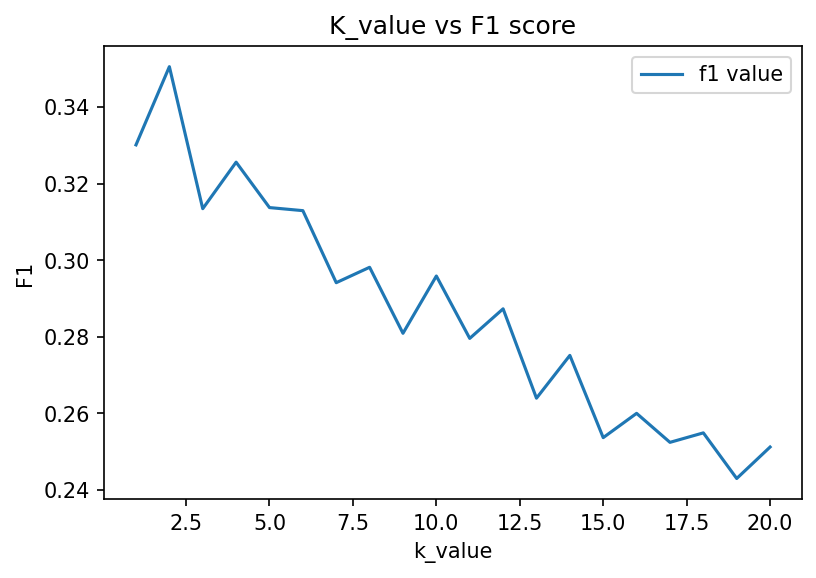

In [163]:
plt.figure(dpi=150)
plt.plot(range(1, 21), f1_list, label='f1 value');
plt.xlabel('k_value')
plt.ylabel('F1')
plt.title("K_value vs F1 score")
plt.legend()

In [104]:
print(np.argmax(f1_list)+1)

2


In [105]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sm, y_train_sm)
prediction_knn = knn.predict(X_val)
# Display accuracy score
print("The best KNN model:")
print("The accuracy score is" , accuracy_score(y_val, prediction_knn))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction_knn))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction_knn))

The accuracy score is 0.9422548120989918
The F1 score is 0.3505154639175258
The auc is 0.7429621104815864


In [106]:
print(classification_report(y_val,prediction_knn))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1059
           1       0.26      0.53      0.35        32

    accuracy                           0.94      1091
   macro avg       0.62      0.74      0.66      1091
weighted avg       0.96      0.94      0.95      1091



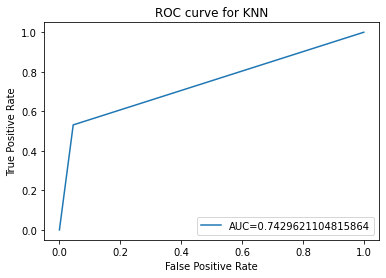

In [107]:
#ROC curve
fpr, tpr, _ = roc_curve(y_val,prediction_knn)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(roc_auc_score(y_val, prediction_knn)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve for KNN")
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)
prediction = lr.predict(X_val)
# Display accuracy score
print("For base logistic regression model:")
print("The accuracy score is" , accuracy_score(y_val, prediction))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction))

For base model:
The accuracy score is 0.9734188817598534
The F1 score is 0.25641025641025644
The auc is 0.5771807129367328


In [111]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression().fit(X_train_sm,y_train_sm)
prediction = lr1.predict(X_val)
# Display accuracy score
print("For base and oversampling logistic regression model: ")
print("The accuracy score is" , accuracy_score(y_val, prediction))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction))

For base and oversampling logistic regression model: 
The accuracy score is 0.8735105407882676
The F1 score is 0.29591836734693877
The auc is 0.8893856232294617


/Users/estelle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
#tune paramaters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.warn('ignore')
lr2 = LogisticRegression()
params = {'penalty' : ['l1', 'l2'],
          'C':[0.01, 0.1, 1, 10, 100]}
gsv_lr = GridSearchCV(lr2, params, cv=10, n_jobs=-1, scoring='f1')
gsv_lr.fit(X_train_sm,y_train_sm)

/var/folders/hk/kb4d7y8d5_191cy2wqvq1jtm0000gn/T/ipykernel_5924/1224824803.py:4: UserWarning: ignore
  warnings.warn('ignore')
/Users/estelle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/estelle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please 

/Users/estelle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/estelle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1')

In [164]:
gsv_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [152]:
prediction_lr = gsv_lr.best_estimator_.predict(X_val)
# Display accuracy score
print("The accuracy score is" , accuracy_score(y_val, prediction_lr))
# Display F1 score
print("The F1 score is" , f1_score(y_val,prediction_lr))
# Displat auc score
print("The auc is",roc_auc_score(y_val,prediction_lr))

The accuracy score is 0.8991750687442713
The F1 score is 0.3373493975903615
The auc is 0.8874527856468366


In [154]:
print(classification_report(y_val,prediction_lr))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1059
           1       0.21      0.88      0.34        32

    accuracy                           0.90      1091
   macro avg       0.60      0.89      0.64      1091
weighted avg       0.97      0.90      0.93      1091



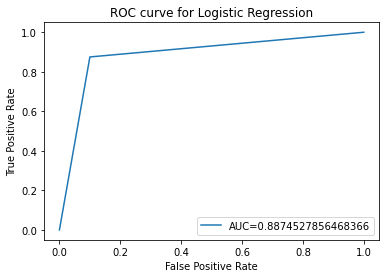

In [155]:
#ROC curve
fpr, tpr, _ = roc_curve(y_val,prediction_lr)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(roc_auc_score(y_val, prediction_lr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve for Logistic Regression")
plt.legend(loc=4)
plt.show()

In [170]:
table = {'Model':["Random Forest","KNN","Logistic Regression"],
         'Accuracy':[accuracy_score(y_val, prediction_rf),accuracy_score(y_val, prediction_knn),accuracy_score(y_val, prediction_lr)],
         'F1_score':[f1_score(y_val, prediction_rf),f1_score(y_val, prediction_knn),f1_score(y_val, prediction_lr)],
         'Auc':[roc_auc_score(y_val, prediction_rf),roc_auc_score(y_val, prediction_knn),roc_auc_score(y_val, prediction_lr)]}
table = pd.DataFrame(data=table)
table

,Model,Accuracy,F1_score,Auc
0,Random Forest,0.970669,0.567568,0.818210
1,KNN,0.942255,0.350515,0.742962
2,Logistic Regression,0.899175,0.337349,0.887453


### Prediction

In [156]:
test = pd.read_csv("/Users/estelle/Desktop/MF815/test.csv")
test = test.drop("Unnamed: 0", axis='columns')
test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.477843,0.543066,0.530971,0.601551,0.601385,0.998982,0.797425,0.809347,0.303560,0.781594,...,0.802411,0.002498,0.624508,0.601549,0.840452,0.277248,0.026933,0.565754,1,0.047947
1,0.471750,0.537178,0.526099,0.597198,0.597198,0.998968,0.797385,0.809313,0.303517,0.781572,...,0.798262,0.003474,0.623589,0.597193,0.840230,0.279860,0.028270,0.568097,1,0.028924
2,0.455906,0.503216,0.513357,0.606588,0.606740,0.998894,0.797101,0.809085,0.303177,0.781378,...,0.778362,0.016904,0.623824,0.606590,0.838494,0.280741,0.026606,0.564091,1,0.026206
3,0.491103,0.542575,0.543445,0.602668,0.602668,0.999013,0.797431,0.809345,0.303505,0.781602,...,0.801665,0.001678,0.625368,0.602668,0.840514,0.279999,0.026869,0.565504,1,0.028434
4,0.506849,0.550316,0.554901,0.602538,0.602409,0.999019,0.797417,0.809328,0.303467,0.781588,...,0.803628,0.001889,0.623598,0.602538,0.840614,0.278829,0.027218,0.566608,1,0.033571


In [157]:
X_test = test.T[feat_selector.support_].T

In [158]:
y_test = gsv_rf.best_estimator_.predict(X_test)

/Users/estelle/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


(array([1298.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

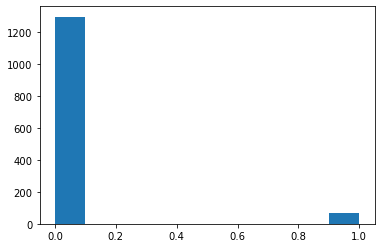

In [159]:
plt.hist(y_test)